<a href="https://colab.research.google.com/github/Raghvendra9936/Hand-Written-digit-Recognization/blob/main/Hand_Written_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hand Written digit Recognization System

## Fetching DataSet

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.datasets import fetch_openml

from sklearn.metrics import precision_score, recall_score, f1_score


In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mist = fetch_openml(name='mnist_784', version=1, parser="auto")

In [ ]:
x, y = mist['data'], mist['target']

In [ ]:
x.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28, 28)

(-0.5, 27.5, 27.5, -0.5)

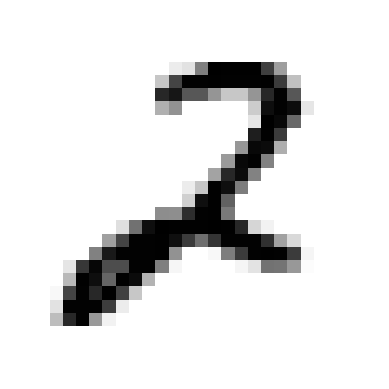

In [ ]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [ ]:
y.loc[[36001]]

36001    2
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
x_train, x_test = x[:60000], x[60000:]

In [ ]:
y_train, y_test = y[:60000], y[60000:]

In [ ]:
import numpy as np

shuffle_index = np.random.permutation(60000)
x_train = x_train.iloc[shuffle_index]
y_train = y_train.iloc[shuffle_index]

## Creating a 2

In [ ]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train== 2)
y_test_2 = (y_test== 2)

In [ ]:
y_train

6255     5
32915    5
31674    7
30087    0
58029    7
        ..
42617    8
39722    5
12819    7
8472     0
18285    3
Name: class, Length: 60000, dtype: int8

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(tol=0.1, solver='lbfgs')

In [ ]:

clf.fit(x_train, y_train_2)

C:\Users\Kalpana Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [ ]:
clf.predict([some_digit])

C:\Users\Kalpana Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

In [ ]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")

C:\Users\Kalpana Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kalpana Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

In [ ]:
a.mean()

0.9782000000000001

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(clf, x_train, y_train_2, cv=3)

C:\Users\Kalpana Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kalpana Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

In [ ]:
y_train_predict

array([False, False, False, ..., False, False, False])

## Cslculating Confusion maytrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_2, y_train_predict)

array([[53547,   495],
       [  813,  5145]], dtype=int64)

In [ ]:
precision_score(y_train_2, y_train_predict)

0.9122340425531915

## Precision, REcall, F1-Score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
recall_score(y_train_2, y_train_predict)

0.8635448136958711

In [ ]:
precision_score(y_train_2, y_train_predict)

0.9122340425531915

In [ ]:
f1_score(y_train_2, y_train_predict)

0.8872219348163477

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_score = cross_val_predict(clf, x_train, y_train_2, cv=3, method="decision_function")
precisions, recall, threshold = precision_recall_curve(y_train_2, y_score)

C:\Users\Kalpana Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kalpana Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

In [ ]:
precisions

array([0.0993    , 0.09930166, 0.09930331, ..., 1.        , 1.        ,
       1.        ])

In [ ]:
recall

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.35683115e-04, 1.67841558e-04, 0.00000000e+00])

In [ ]:
threshold

array([-47.51004821, -47.08231726, -45.28963938, ...,  17.92806271,
        19.93401979,  20.48277132])

In [ ]:
y_score

array([-15.62178083,  -9.03057945, -11.59833151, ..., -13.33389755,
       -14.19109999,  -6.98544592])

## precision recall curve

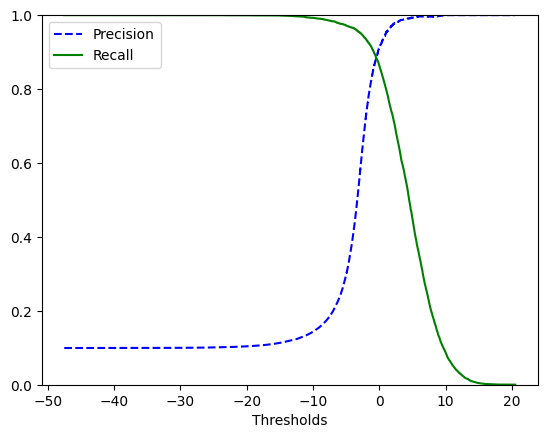

In [ ]:
plt.plot(threshold, precisions[:-1],"b--", label="Precision" )
plt.plot(threshold, recall[:-1],"g-", label="Recall" )
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()

## SGD Classifier

In [ ]:

from sklearn.linear_model import SGDClassifier
clf_sgd = SGDClassifier(tol=0.1)
clf_sgd.fit(x_train,y_train_2)

SGDClassifier(tol=0.1)

In [ ]:
example = clf_sgd.predict([some_digit])
print(example)

[ True]


C:\Users\Kalpana Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [ ]:
a = cross_val_score(clf_sgd, x_train, y_train_2, cv=3, scoring="accuracy")


In [ ]:
print(a.mean())

0.9722833333333334


In [ ]:
y_predict_sgd = cross_val_predict(clf_sgd, x_train, y_train_2, cv=3)


In [ ]:
y_predict_sgd

array([False, False, False, ..., False, False, False])

In [ ]:
print(confusion_matrix(y_train_2, y_predict_sgd))
print("precision_score: ",precision_score(y_train_2, y_predict_sgd))
print("recall_score: ", recall_score(y_train_2, y_predict_sgd))
print("f1_score: ",f1_score(y_train_2, y_predict_sgd))

[[53383   659]
 [ 1182  4776]]
precision_score:  0.8787488500459981
recall_score:  0.8016112789526687
f1_score:  0.8384095497235144


In [ ]:
y_score_sgd = cross_val_predict(clf_sgd, x_train, y_train_2, cv=3, method="decision_function")
precision_sgd, recall_sgd, threshold_sgd = precision_recall_curve(y_train_2, y_score_sgd)

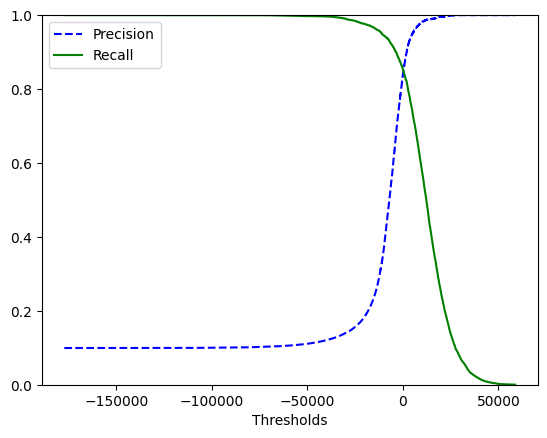

In [ ]:
plt.plot(threshold_sgd, precision_sgd[:-1],"b--", label="Precision" )
plt.plot(threshold_sgd, recall_sgd[:-1],"g-", label="Recall" )
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()

Conclusion: When we used Logistic Regression we get 97.37 accuracy, precision, Recall is also high and 95.83 accuracy with SGDClassifier.